# EDA (Exploratory Data Analysis)
“is an approach to analyzing datasets to summarize their main characteristics, often with visual methods”. 
In other words, it is about knowing your data, gaining a certain amount of familiarity with the data, before one 
starts to extract insights from it.

General Outline of EDA

Our code template shall perform the following steps:

1. Preview data

2. Check total number of entries and column types

3. Check any null values

4. Check duplicate entries

5. Plot distribution of numeric data (univariate and pairwise joint distribution)

6. Plot count distribution of categorical data

7. Analyse time series of numeric data by daily, monthly and yearly frequencies

Basically, it's just analyzing the data and correcting the data, like handling missing values, duplicate values etc. and 
identifying the main features , in order to solve the problem using the data..

more info:
https://towardsdatascience.com/exploratory-data-analysis-eda-a-practical-guide-and-template-for-structured-data-abfbf3ee3bd9


### The necessary dependencies are as such:


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline
#conda install -c conda-forge/label/gcc7 missingno --run cmd from conda propmt as admin..

In [2]:
df = sns.load_dataset("tips")
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## EDA on Titanic DataSet

We are taking "semi-learned version of titanic dataset from kaggle", which is already cleaned, as we are not performing cleaning here. Objective is to predict a classification-survival or deceased by implementing "Logistic Regression" in python for classification.

dataset:
https://www.kaggle.com/hesh97/titanicdataset-traincsv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step1: Preview Data

In [4]:
# Data from Titanic dataset
train=pd.read_csv("E:\\SL\\ai\\sample data files\\titanicdataset-traincsv\\train.csv")
train.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Step2: Analyze Missing data (find missing values and handle them)

In [7]:
train.isnull() # cannot analyze when data records are more..so need to use heatmap of seaborn for better visualization.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


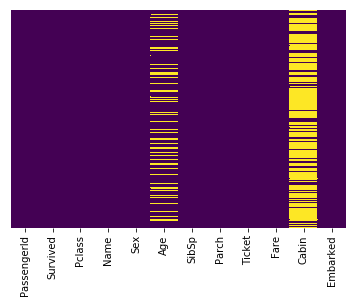

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

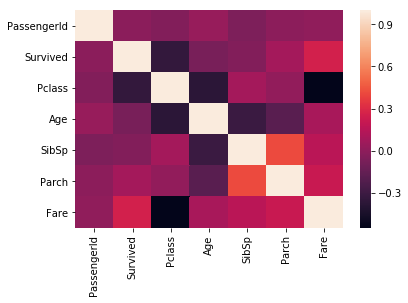

In [9]:
sns.heatmap(train.corr())

In [10]:
train['Fare'].corr(train['Survived'])
train['Age'].corr(train['Survived'])

-0.07722109457217766

0    549
1    342
Name: Survived, dtype: int64

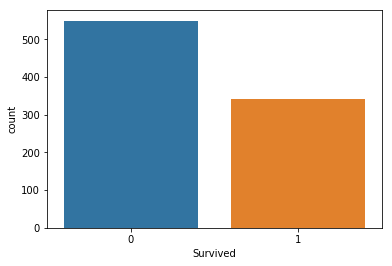

In [11]:
sns.countplot(x='Survived',data=train)
train['Age'].value_counts()
train['Survived'].value_counts()

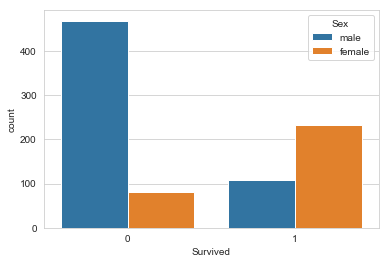

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Sex') # so more females were saved than males

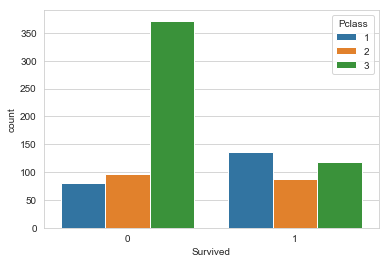

In [13]:
sns.countplot(x='Survived',data=train,hue='Pclass') # Pclass => passenger class 1 is higher and 3 least.., so people with higher
# plcass ( rich people), have survived more.. and people with least pclass(poor people) died more than other two pclass..

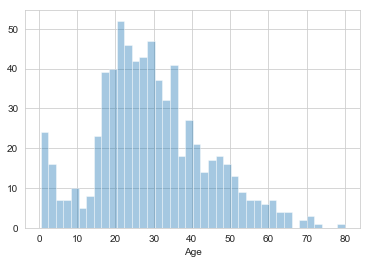

In [14]:
sns.distplot(train['Age'].dropna(),kde=False,bins=40) # distribution plots..

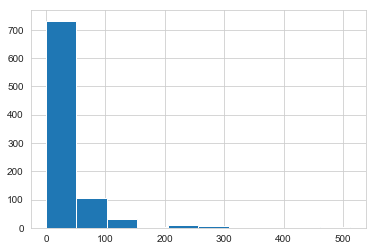

In [15]:
train['Fare'].hist()

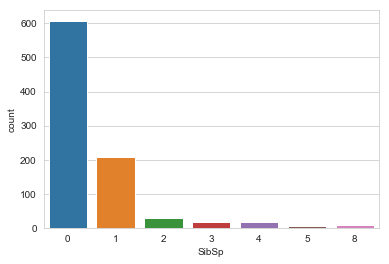

In [16]:
sns.countplot(x='SibSp',data=train) # people who had sibling or spouse..

C:\Users\prathap\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


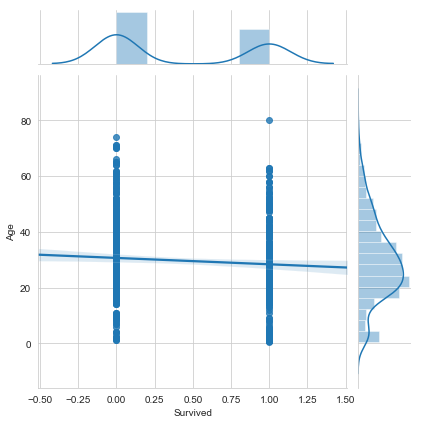

In [17]:
sns.jointplot('Survived','Age',data=train,kind='reg')

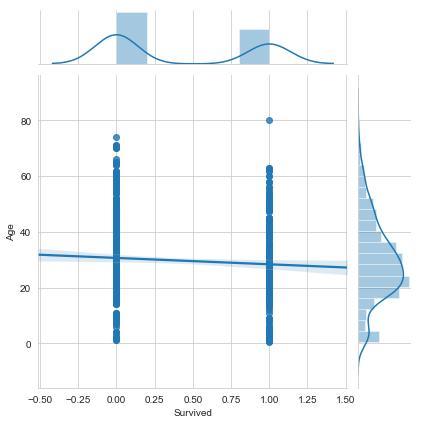

In [18]:
sns.jointplot('Survived','Age',data=train,kind='reg')

C:\Users\prathap\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\prathap\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


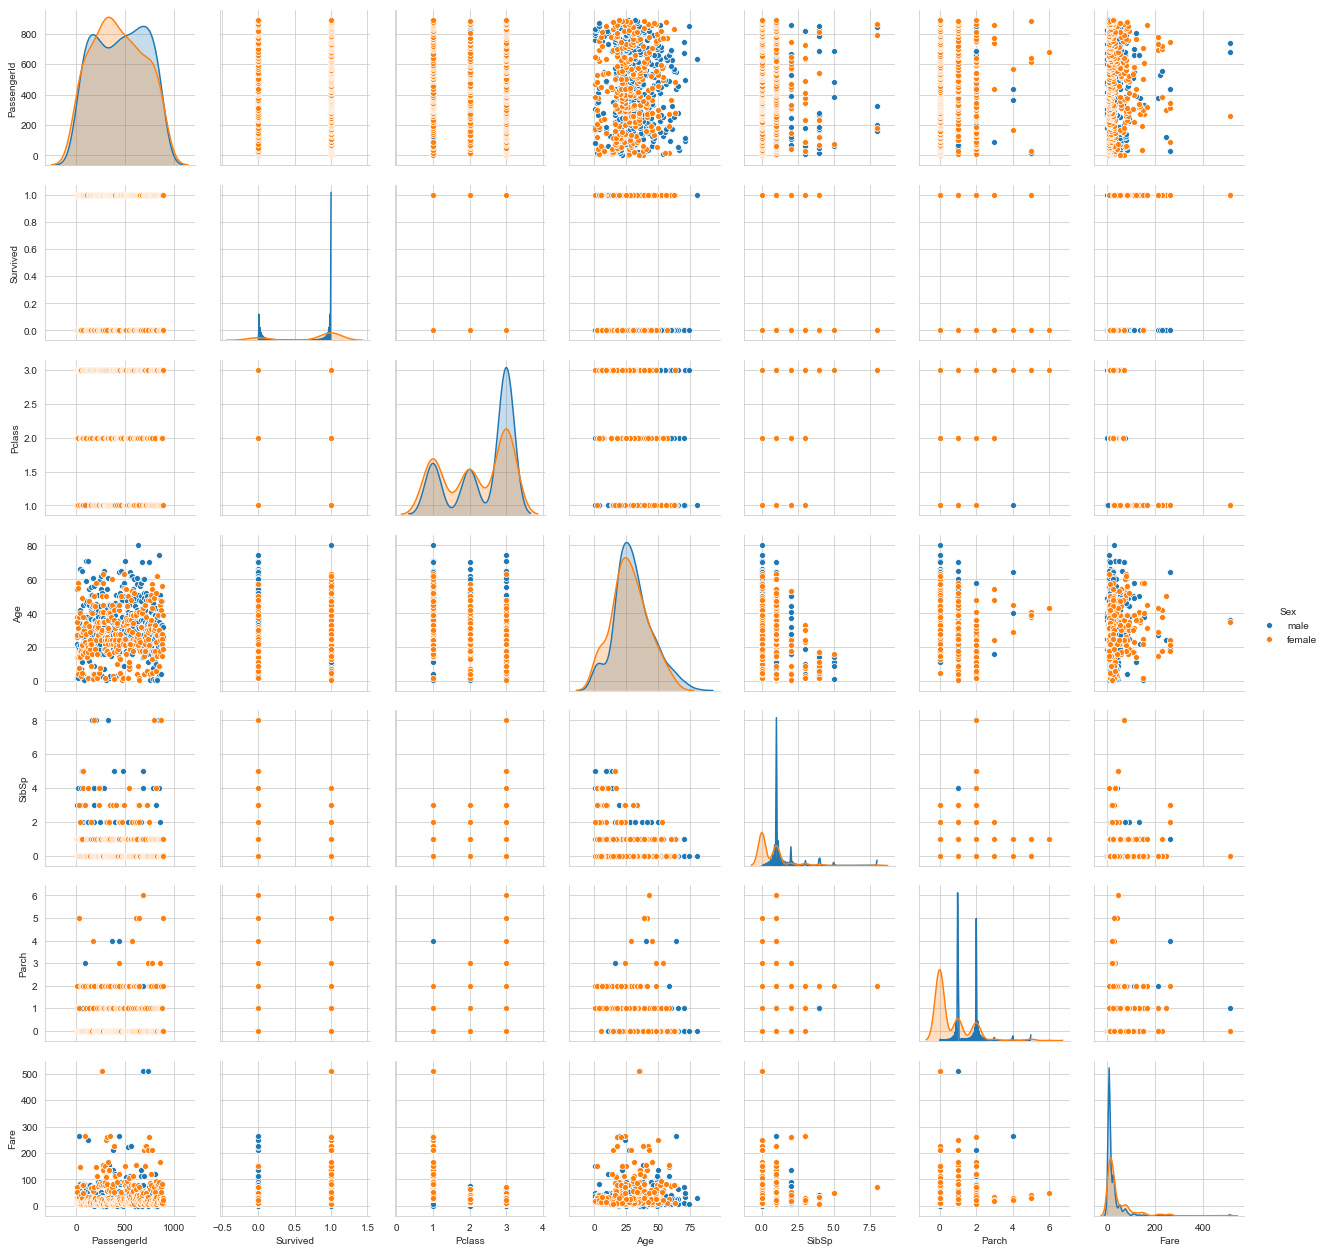

In [19]:
sns.pairplot(data=train,hue='Sex')

## Data Cleaning ( We know that age and cabin columns have null values..)

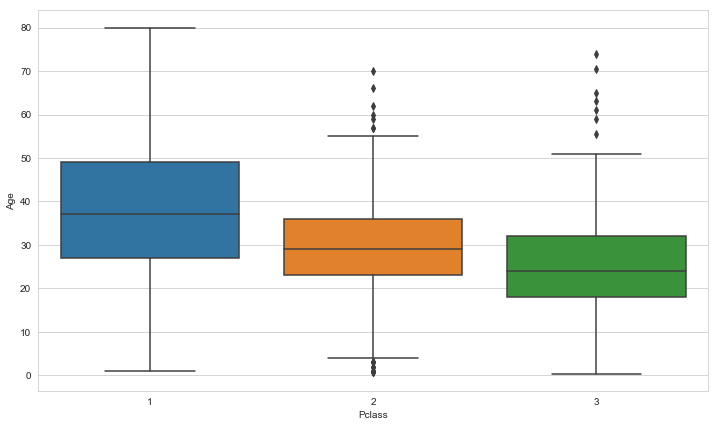

In [20]:
# before cleaning the value analyze the correlation b/w age and pclass..
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train) # we can see from the graph, that wealthier persons are mostly of old age..

In [21]:
# writing a function to get the avg age based on the pclass..
# syntax: def fnName(params): def is a keyword for creating a function,
def impute_age(cols):
    Age=cols[0]
    PClass=cols[1]
    
    if pd.isnull(Age):
        
        if PClass == 1:
            return 37
        elif PClass==2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [22]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1) # updating the age columns with our impute_age() cust function..
# after this if you see the age column, it is updated with the computed func..
# train.isnull()

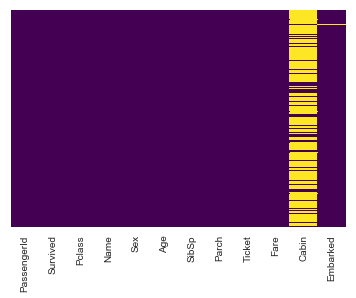

In [23]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis',cbar=False) #Age col is updated with the computed func..
# no null values..

In [24]:
train.drop('Cabin',axis=1,inplace=True)

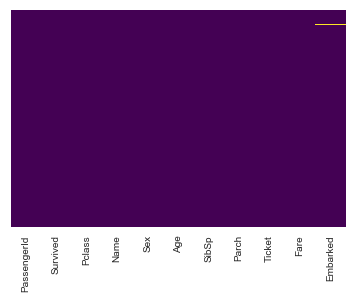

In [25]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [28]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)
# type(embark)

In [29]:
# dropping unwanted cols
train.drop(['Name','Ticket','Sex','Embarked'],axis=1,inplace=True)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [31]:
train=pd.concat([train,sex,embark],axis=1)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Building a Logistic-Regression Model using Sci-Kit Learn Library
#### Here, Survived is dependant feature where as others are independant features.
#### For building the model, first we need to split the data into training set and test set..

# Train Test Split: (A Fundamental Component Sci-Kit Learn Library)
## sklearn.model_selection

###### from sklearn.model_selection import train_test_split => importing train_test_split element from sci-kit

The fn train_test_split(..) splits the data based on the params we pass, into two separate type of pandas.core.series.Series "Training Set" and "Test Set", which will be consumed by the ML algos we use later.

For this splitting, we need to pass "X" and "Y" params. 

Here X => expects the dataframe of all the independant features ("All cols except "Survived" col)

ex: in the current case: 
###### X=train.drop('Survived',axis=1) => returns a dataframe(pandas.core.frame.DataFrame)

and 

Y => expects an array or pandas.core.series.Series object, which is usually the dependant feature("Survived" col values)

ex: in the current case: 
###### Y=train['Survived'] => returns a series (pandas.core.series.Series)

So, the implmn will be 
###### x_train,x_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,train_size=0.70,random_state=101)
OR
###### ListOfTrainingAndTestData=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,train_size=0.70,random_state=101)

test_size and train_size are the % values(like 0.30) based on which the fn, splits the data into training n test set. Other options are self explanatory.

In [33]:
train.drop('Survived',axis=1).head() # training data..returns a dataframe except the dependant feature 'Survived' which will be
# passed as the training data for train_test_split(..) constructor.. Also, this will be considered as "X" axis values OR the 
# list of independant features(dataframe) for which the result/output dependant feature("Survived") needs to be mapped,, which 
# will be passed(train['Survived']) later for train_test_split(..) constructor.

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [34]:
train.drop('Survived',axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
male           891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [35]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [36]:
type(train['Survived'])
train['Survived'].head() # output data

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Implementation of train_test_split(...) fn:
So basically, train_test_split(...), returns a list of 4 objects, 2 with train data and 2 with test data, and the type is
same as the object types sent for "X" and "Y" params, 

so, if "X"=> DataFrame then, lst[0] n lst[1] OR x_train and x_test types will be DataFrame.

    if "Y"=> Series then, lst[2] n lst[3] OR y_train and y_test types will be Series.

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),
                                               train['Survived'],
                                               test_size=0.30,
                                               train_size=0.70,
                                               random_state=101)

# for testing..
lst=(train_test_split(train.drop('Survived',axis=1),
                                               train['Survived'],
                                               test_size=0.30,
                                               train_size=0.70,
                                               random_state=101))

# So basically, train_test_split(...), returns a list of 4 objects, 2 with train data and 2 with test data, and the type is
# same as the object types sent for "X" and "Y" params, 
# so if "X"=> DataFrame then, lst[0] n lst[1] OR x_train and x_test types will be DataFrame.
# if "Y"=> Series then, lst[2] n lst[3] OR y_train and y_test types will be Series.
print(len(lst))
print(type(lst[0]))
print(type(lst[1]))
print(type(lst[2]))
print(type(lst[3]))

print('---------x_train-------------------')
print(lst[0].head())
print(x_train.head())

print('-----------x_test-----------------')
print(lst[1][0:5])
print(x_test[0:5])

print('------------y_train----------------')
print(lst[2].head())
print(y_train.head())

print('-------------y_test---------------')
print(lst[3].head())
print(y_test.head())


4
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
---------x_train-------------------
     PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
520          521       1  30.0      0      0  93.5000     0  0  1
510          511       3  29.0      0      0   7.7500     1  1  0
446          447       2  13.0      0      1  19.5000     0  0  1
2              3       3  26.0      0      0   7.9250     0  0  1
691          692       3   4.0      0      1  13.4167     0  0  0
     PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
520          521       1  30.0      0      0  93.5000     0  0  1
510          511       3  29.0      0      0   7.7500     1  1  0
446          447       2  13.0      0      1  19.5000     0  0  1
2              3       3  26.0      0      0   7.9250     0  0  1
691          692       3   4.0      0      1  13.4167     0  0  0
-----------x_test-----

# Training and Predicting:

## LogisticRegression and Linear Regression:

### Logistic Regression: ( Supervised => Classification)

Here, we chose what model/algo that we need to use. Then pass the training and test sets for the output. The algo then process
the data and gives the output.

In current case, we are using LogisticRegression Algo, which is basically a "Supervised Classification Algo" and used for "Classification". Here, the problem statement will always be kind of "Classification" problem which is "Supervised" (meaning we are guiding the Algo by sending the historical(existing) data "With Results" and then using this historical data analyzed template for predicting future outcomes for newly sent data). It gives the result as a sigmoid curve.

#### So, basically both "The System predicts future outcomes based on a training from a past inputs."

Here in this Algo, It always gives a discrete result meaning a Yes/No prediction.(Hence Logistic=> Logic interference). Ironically though the name has "Regression" in it, but it falls under "Classification" category not "Regression".
Best examples for this type of algo, is predicting whether it will rain or not(Y/N) and Identifying an image(Dog or Cat).

### Linear Regression: ( Supervised => Regression)
On Contrary to the Logistic Regression, Linear Regression is a "Supervised Regression Algo" and used for regression and gives a continous outcomes/results. Best ex: Predicting the whether on hourly/daily basis or predicting share market prices etc..

Also, note in some cases, both of these algos can be combined..

for more info and to understand math behind it check : https://www.youtube.com/watch?v=XnOAdxOWXWg

Logistic Regression | Logistic Regression in Python | Machine Learning Algorithms | Simplilearn

### Implementation of Training and Predicting using LogisticRegression:
Import library:

##### from sklearn.linear_model import LogisticRegression

Basically will get the sklearn.linear_model.logistic.LogisticRegression object by calling LogisticRegression() and pass the training sets (x_train,y_train) to the object's fit method.

##### logmodel=LogisticRegression()
##### logmodel.fit(x_train,y_train))

And then use this object along the way for making predictions(logmodel.predict(x_test)) by passing the "Testing Set" (x_test). So it returns an object of type (class 'numpy.ndarray') which are the outcomes/results for the "Test_Set" predicted by the Algo/Model ( in this case LogisticRegression Model).

##### predictions= logmodel.predict(x_test)

Now, in order to check the accuracy of the predicted values by the algo, Will use below library objects.

##### from sklearn.metrics import confusion_matrix 

##### from sklearn.metrics import accuracy_score

And then just pass the "y_test"(test_result_set) and "predictions" objects to the above object's constructors, will get the accuracy object or % from the fns.

##### accuracy=confusion_matrix(y_test,predictions)

##### accuracy=accuracy_score(y_test,predictions)


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel=LogisticRegression()
print(type(logmodel))
logmodel.fit(x_train,y_train)

<class 'sklearn.linear_model.logistic.LogisticRegression'>


C:\Users\prathap\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
predictions=logmodel.predict(x_test)

In [42]:
print(type(predictions))
predictions

<class 'numpy.ndarray'>


array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
accuracy=confusion_matrix(y_test,predictions)

In [45]:
print(type(accuracy))
accuracy

<class 'numpy.ndarray'>


array([[135,  19],
       [ 41,  73]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy=accuracy_score(y_test,predictions)

In [48]:
accuracy

0.7761194029850746